<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/whitenoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling & Analyzing (Gaussian) White Noise Processes

*Author: Alexander Del Toro Barba*

## What is a white noise process?

stationary bla bla

https://machinelearningmastery.com/white-noise-time-series-python/

with alt data (NYCflights13 data)
https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

**next step: random walk** https://www.quantstart.com/articles/White-Noise-and-Random-Walks-in-Time-Series-Analysis/

# Import Libraries

In [2]:
# Import packages
import numpy as np
import sklearn
from decimal import *
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import collections
import datetime
import matplotlib
from scipy import stats
import scipy.stats as stats
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from numpy import sqrt
from copy import copy
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Create White Noise Process

In [0]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot

# seed random number generator
seed(1)

# create white noise series
series = [gauss(0.0, 1.0) for i in range(3000)]
series = Series(series)

# Summarize Time Series

In [34]:
series.head()

0    1.288185
1    1.449446
2    0.066336
3   -0.764544
4   -1.092173
dtype: float64

In [6]:
series.describe()

count    3000.000000
mean        0.007780
std         0.995494
min        -3.149965
25%        -0.648906
50%         0.005181
75%         0.689631
max         3.284978
dtype: float64

In [7]:
series.skew()

-0.04977536942634736

In [8]:
series.kurt()

-0.13723426818327544

In [9]:
series.quantile(0.95)

1.6407238550995906

# Visualize Time Series

## Time Series Plot

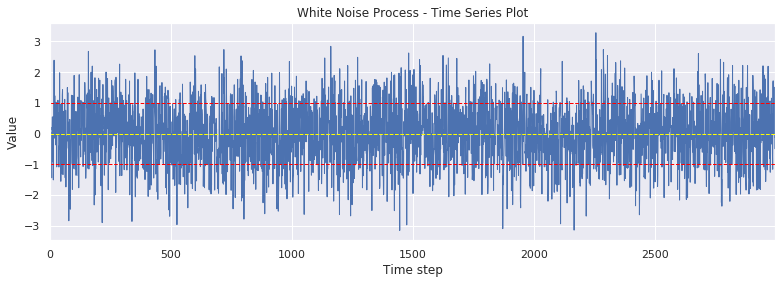

In [10]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.0,title='White Noise Process - Time Series Plot')
plt.ylabel('Value')
plt.xlabel('Time step')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0);

## Distribution Plot

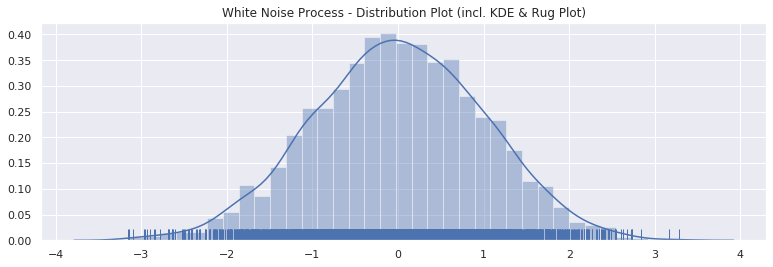

In [25]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

## Rug Plot

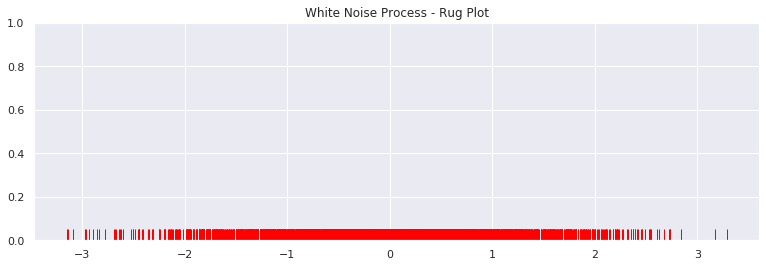

In [22]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
sns.rugplot((df), color ='red').set_title('White Noise Process - Rug Plot')
plt.show()

## KDE Plot

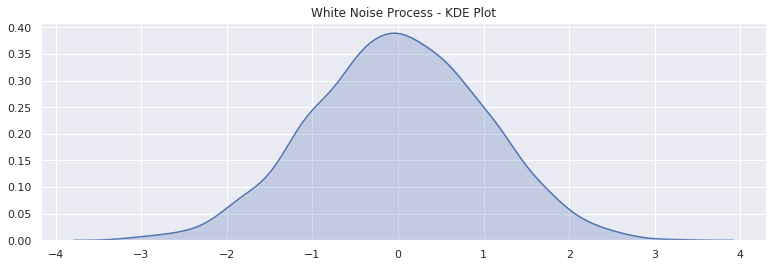

In [38]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
sns.kdeplot(df, shade=True).set_title('White Noise Process - KDE Plot')
plt.show()

## Autocorrelation Plot

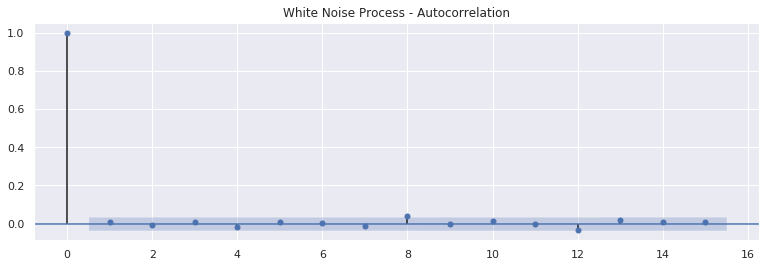

In [12]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(series.squeeze(), lags=15)
plt.title('White Noise Process - Autocorrelation')
plt.show()

## Partial Autocorrelation Plot

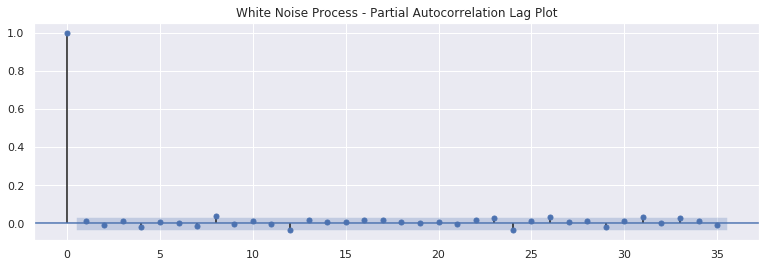

In [13]:
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

## Lag Plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


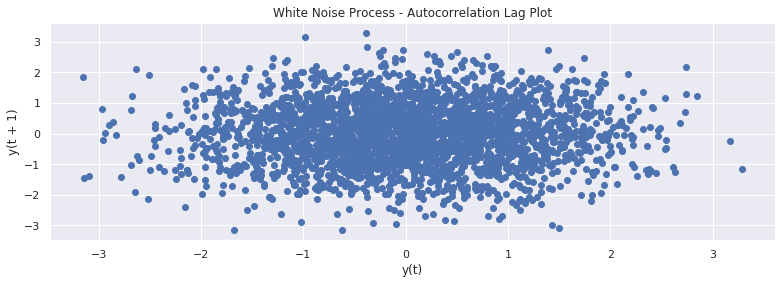

In [14]:
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

## Box Plot

Text(0.5, 1.0, 'White Noise Process - Boxplot')

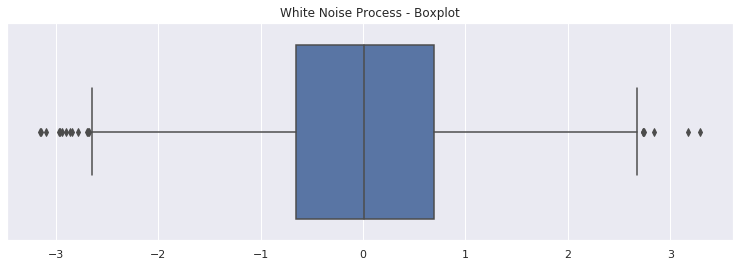

In [15]:
sns.boxplot(series).set_title('White Noise Process - Boxplot')

## QQ Plot

**Normal Distribution**

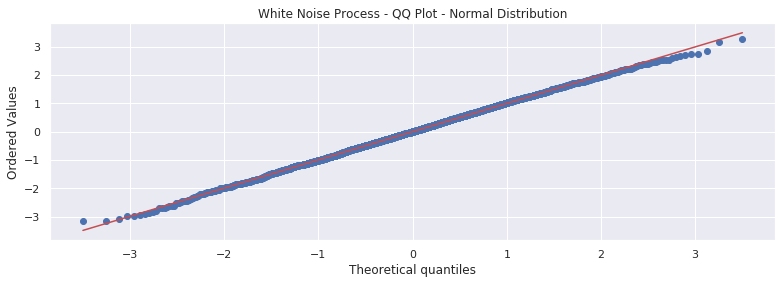

In [16]:
stats.probplot(series, dist="norm", plot=plt)
plt.title('White Noise Process - QQ Plot - Normal Distribution')
plt.show()

**QQ Plot of the residuals against quantiles of t-distribution with 4 degress of freedom**

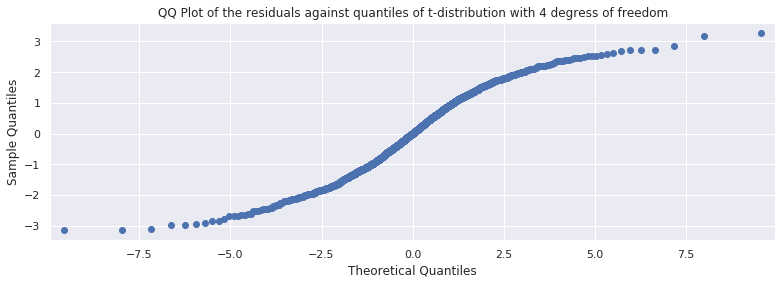

In [17]:
fig = sm.qqplot(series, stats.t, distargs=(4,))
plt.title('QQ Plot of the residuals against quantiles of t-distribution with 4 degress of freedom')
plt.show()

**QQ Plot of the residuals against quantiles of t-distribution with mean 3 and std 10**

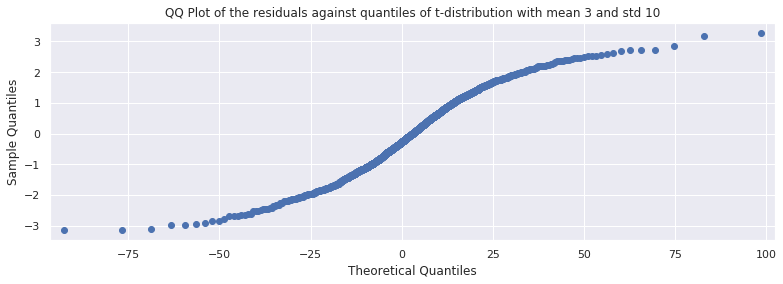

In [18]:
fig = sm.qqplot(series, stats.t, distargs=(4,), loc=3, scale=10)
plt.title('QQ Plot of the residuals against quantiles of t-distribution with mean 3 and std 10')
plt.show()

**Automatically determine parameters for t distribution including the loc and scale**

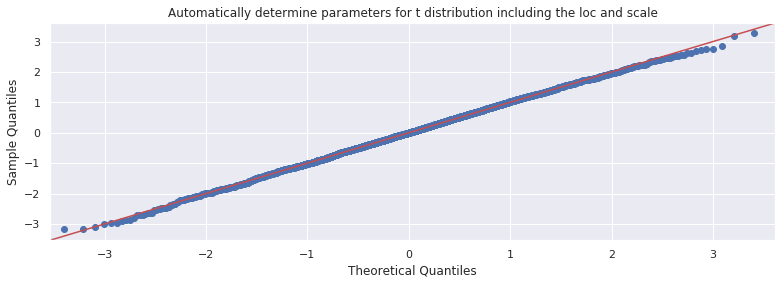

In [19]:
fig = sm.qqplot(series, stats.t, fit=True, line='45')
plt.title('Automatically determine parameters for t distribution including the loc and scale')
plt.show()

**QQ Plot - Cauchy Distribution**

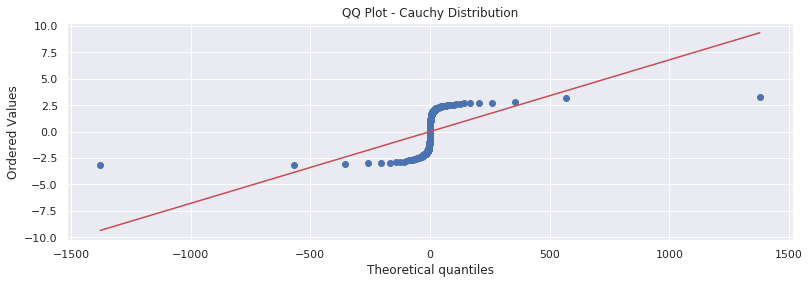

In [20]:
stats.probplot(series, dist="cauchy", plot=plt)
plt.title('QQ Plot - Cauchy Distribution')
plt.show()

**QQ Plot - Levy Distribution**

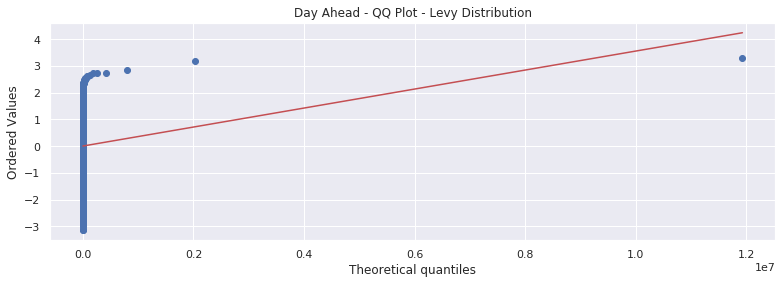

In [21]:
stats.probplot(series, dist="levy", plot=plt)
plt.title('QQ Plot - Levy Distribution')
plt.show()

# (Normal) Distribution Tests

## BDS Independence Test

In [0]:
# BDS test statistic for independence of a time series
# Time Series is IID (= Null Hypothesis)
statsmodels.tsa.stattools.bds(series, max_dim=2, epsilon=None, distance=1.5)

(array(-1.61871806), array(0.10550794))

## Kolmogorov-Smirnov Test

In [39]:
# Kolmogorov-Smirnov Test
stats.kstest(series, 'norm')

KstestResult(statistic=0.0101376809831496, pvalue=0.9174327979005003)

## Jarque-Bera Test

compares sample skewness and kurtosis to 0 and 3, their values under normality.

The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html

Null hypothesis: sample is normal distributed. JB(PValue<0.05)= Reject Ho (Non-Normal Distribution)

In [0]:
stats.jarque_bera(series)

## Anderson-Darling Test

Anderson Darling tests whether the sample from the population follows a particular distribution (default: normal).

In [0]:
stats.anderson(series)

# Stationarity & Unit Root Tests

## KPSS Level Stationary Test

* Kwiatkowski-Phillips-Schmidt-Shin to test if time series is stationarity. Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary. Stationarity Test: KPSS
* H0: Series has no unit root (is stationary or a deterministic trend). Ha: Series is not stationary
* Reject H0 if  p-value of less than 5% and test stats higher than provided critical values

**Cautions**

* A major disadvantage for the KPSS test is that it has a high rate of Type I errors (it tends to reject the null hypothesis too often). If attempts are made to control these errors (by having larger p-values), then that negatively impacts the test’s power.

* One way to deal with the potential for high Type I errors is to combine the KPSS with an ADF test. If the result from both tests suggests that the time series in stationary, then it probably is.

* https://www.statisticshowto.datasciencecentral.com/kpss-test/

**KPSS - Level Stationarity Test**

‘c’ : The data is stationary around a constant (default).

H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [46]:
statsmodels.tsa.stattools.kpss(series, regression='c', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.07356701300567194,
 0.1,
 29,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Test statistics at 0.07 is not more extreme than the provided critical value of 0.46 for 5%. p-value is not below 0.05. Do not reject H0. Process is stationary around a constant.


## KPSS Trend Stationary Test

‘ct’ : The data is stationary around a trend.

H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [47]:
statsmodels.tsa.stattools.kpss(series, regression='ct', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.07262329049393641,
 0.1,
 29,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Test statistics is smaller than provided critical value of 0.146. p-value is at 0.1 (“not significant”). Do not reject H0.

Summary: Both test show no unit root. Time series is either trend or level stationary.

## Augmented Dickey Fuller

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

H0: There is a unit root for the series (non stationary)

Ha: There is no unit root for the series. The series is stationary.

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

**Choose regression {‘c’,’ct’,’ctt’,’nc’} - Constant and trend order to include in regression.**

* ‘c’ : constant only (default).
* ‘ct’ : constant and trend.
* ‘ctt’ : constant, and linear and quadratic trend.
* ‘nc’ : no constant, no trend.

Example: In ADF HO was rejected with trend: no presents of unit root, no trend and no drift. -> test result is that time series contains no unit root and is therefore trend stationary on a 1 % significance level, i.e. is stationary except a deterministic trend. One might want to test if time series is even level stationary: apply an ADF test with level and without trend. If one still can reject the null hypothesis of a unit root, one can conclude stationarity.

In [43]:
# no constant, no trend
statsmodels.tsa.stattools.adfuller(series, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-54.207282722827145,
 0.0,
 0,
 2999,
 {'1%': -2.566485918440525,
  '10%': -1.616731737962061,
  '5%': -1.9410899361684375},
 8408.62980517435)

Test stats is much higher than all provided critical values. p-value is zero (below 0.05 significance). Reject H0. Series is stationary.

## Zivot-Andrews Structural-break

Unit root tests can be wrong if a structural break occurred in timeseries. Zivot-Andrews test checks for structural Break Unit Root.

H0 = unit root with a single structural break

In [0]:
statsmodels.tsa.stattools.zivot_andrews(series, regression='c', autolag='aic')

# Portmanteau & Autocorrelation Tests

Portmanteau-Tests sind statistische Tests, mit deren Hilfe für mehrere Autokorrelationskoeffizienten getestet werden kann, ob sie sich signifikant von null unterscheiden. Dies ist vor allem bei der Prüfung der Autokorrelationsfreiheit der Residuen im Rahmen der Diagnosephase einer Zeitreihenanalyse wichtig.
Portmanteau-Tests sind reine Signifikanztests. Sie testen nicht gegen eine klar formulierte Gegenhypothese.
Die Teststatistik wird Q-Statistik genannt.

## Ljung-Box Q Statistic

Ljung–Box test is an improved version of the Box–Pierce test

In [48]:
# Ljung-Box Q Statistic
# Returns Ljung-Box Q-statistic for autocorrelation parameters and p-value
# examining the null hypothesis of independence in a given time series. These are sometimes known as ‘portmanteau’ tests.
statsmodels.tsa.stattools.q_stat(series, nobs=3000, type='ljungbox')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:469: RuntimeWarning: divide by zero encountered in true_divide
  np.cumsum((1. / (nobs - np.arange(1, len(x) + 1))) * x**2))


(array([4.98323979e+03, 1.12943267e+04, 1.13075500e+04, ...,
        6.65032219e+07, 6.87125325e+07,            inf]),
 array([0., 0., 0., ..., 0., 0., 0.]))

## Durban-Watson Statistic

Used in autoregressive models
The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. 
A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation. 
A stock price displaying positive autocorrelation would indicate that the price yesterday has a positive correlation on the price today—so if the stock fell yesterday, it is also likely that it falls today. A security that has a negative autocorrelation, on the other hand, has a negative influence on itself over time—so that if it fell yesterday, there is a greater likelihood it will rise today.


In [0]:
#

## Breusch–Godfrey Test

Tests for the presence of serial correlation that has not been included in a proposed model structure and which, if present, would mean that incorrect conclusions would be drawn from other tests, or that sub-optimal estimates of model parameters are obtained if it is not taken into account.

**Important:**

There are some strong voices in the Econometrics community against the validity of the Ljung-Box Q-statistic for testing for autocorrelation based on the residuals from an autoregressive model (i.e. with lagged dependent variables in the regressor matrix), see particularly Maddala (2001) "Introduction to Econometrics (3d edition), ch 6.7, and 13. 5 p 528. Maddala literally laments the widespread use of this test, and instead considers as appropriate the "Langrange Multiplier" test of Breusch and Godfrey.

Maddala's argument against the Ljung-Box test is the same as the one raised against another omnipresent autocorrelation test, the "Durbin-Watson" one: with lagged dependent variables in the regressor matrix, the test is biased in favor of maintaining the null hypothesis of "no-autocorrelation" (the Monte-Carlo results obtained in @javlacalle answer allude to this fact). Maddala also mentions the low power of the test, see for example Davies, N., & Newbold, P. (1979). Some power studies of a portmanteau test of time series model specification. Biometrika, 66(1), 153-155.

In [0]:
#